<a href="https://colab.research.google.com/github/inderpreetsingh01/PyMath/blob/main/numpy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
names = np.array(['Jim', 'kim', 'tim', 'jack'])
first_letter_j = np.vectorize(lambda x:x[0].lower())(names) == 'j'
names[first_letter_j]

# np.vectorize is a convenience wrapper that allows you to apply a Python function element-wise to NumPy arrays —
# as if it were a NumPy ufunc (universal function).
# np.vectorize does not make the function faster — it's still a loop under the hood.
# It only provides cleaner syntax and broadcasting support like NumPy functions.

array(['Jim', 'jack'], dtype='<U4')

In [4]:
def myfunc(x):
    return x**2 if x % 2 == 0 else -x

vfunc = np.vectorize(myfunc)

a = np.array([1, 2, 3, 4])
result = vfunc(a)
print(result)

[-1  4 -3 16]


In [2]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])

row_sums = np.sum(a, axis=1)  # shape: (2,)
# a.shape: (2, 3), row_sums.shape: (2,)

a / row_sums

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [3]:
# The keepdims parameter in NumPy functions like np.sum, np.mean, np.max, etc.,
# controls whether the reduced axes are kept in the result as dimensions with size 1
row_sums = np.sum(a, axis=1, keepdims=True)  # shape: (2,)
# a.shape: (2, 3), row_sums.shape: (2,)

a / row_sums

array([[0.16666667, 0.33333333, 0.5       ],
       [0.26666667, 0.33333333, 0.4       ]])

In [4]:
arr1 = np.array([[1,2,3],[4,5,6]])
arr2 = np.array([[2,1,2],[1,1,2]])

In [5]:
# element wise product
arr1*arr2

array([[ 2,  2,  6],
       [ 4,  5, 12]])

In [6]:
# another way of indexing
arr1[[1,0],[2,1]] = 0

In [7]:
arr1

array([[1, 0, 3],
       [4, 5, 0]])

In [8]:
# np.c_ is a convenient indexing trick in NumPy used to concatenate arrays column-wise (i.e., along axis=1).
# You can think of it as a quick shortcut for np.column_stack or np.concatenate(..., axis=1), but with a more compact and flexible syntax.
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

np.c_[a, b]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [9]:
x = np.array([1, 2, 3])
y = np.array([10, 20, 30])
np.c_[x, y]
# shape: (3, 2)

array([[ 1, 10],
       [ 2, 20],
       [ 3, 30]])

In [10]:
np.c_[1:5, 10:14]
# Output:
# array([[ 1, 10],
#        [ 2, 11],
#        [ 3, 12],
#        [ 4, 13]])

array([[ 1, 10],
       [ 2, 11],
       [ 3, 12],
       [ 4, 13]])

In [11]:
np.stack([np.arange(1, 5), np.arange(10, 14)], axis=1)

array([[ 1, 10],
       [ 2, 11],
       [ 3, 12],
       [ 4, 13]])

In [12]:
a = np.array([1, 2, 3])
np.c_[a, np.ones(3)]
# Output:
# array([[1., 1.],
#        [2., 1.],
#        [3., 1.]])

array([[1., 1.],
       [2., 1.],
       [3., 1.]])

In [ ]:
# np.r_ is also there

#Statistics

In [5]:
arr = np.random.randn(1000)*2+10

In [6]:
# mean of distribution
np.mean(arr)

np.float64(9.867386097863035)

In [7]:
# std of distribution
np.std(arr)

np.float64(2.0859790658065824)

In [8]:
# compute the number for given percentile in percentage bw [0, 100]
np.percentile(arr, 50)

np.float64(9.791811141906926)

In [10]:
np.percentile(arr, 84)

np.float64(11.979055710403602)

In [11]:
# number for given quantile in bw [0, 1]
np.quantile(arr, 0.5)

np.float64(9.791811141906926)

In [12]:
# given the number the percentile it represent or the percentage of elements less than it
x = np.mean(arr) + np.std(arr)
percentile = (np.sum(arr < x) + 0.5 * np.sum(arr == x)) / len(arr) * 100

In [13]:
percentile

np.float64(83.5)

In [14]:
x

np.float64(11.953365163669616)

In [15]:
np.percentile(arr, 83.5)

np.float64(11.953881652806668)

In [18]:
# percentage of points within (-sigma, sigma)
percentage = np.sum((arr >= np.mean(arr) - np.std(arr)) & (arr <= np.mean(arr) + np.std(arr))) / len(arr) * 100

In [19]:
percentage

np.float64(66.7)

In [21]:
# np.std / np.var use population formula unless you set ddof=1
# np.cov uses sample formula by default (ddof=1)
# Always specify ddof explicitly if statistical correctness matters


arr = np.array([1, 2, 3, 4, 5])

print("Population std:", np.std(arr))           # ddof=0
print("Sample std:", np.std(arr, ddof=1))       # ddof=1
print("\n")

x = np.array([1, 2, 3])
y = np.array([2, 4, 6])
print("Sample covariance:\n", np.cov(x, y))     # ddof=1 by default
print("Population covariance:\n", np.cov(x, y, ddof=0))

Population std: 1.4142135623730951
Sample std: 1.5811388300841898


Sample covariance:
 [[1. 2.]
 [2. 4.]]
Population covariance:
 [[0.66666667 1.33333333]
 [1.33333333 2.66666667]]


**ddof — Delta Degrees of Freedom**
- ddof (Delta Degrees of Freedom) is a parameter used in statistical functions like np.std(), np.var(), and np.cov() to control whether the calculation is for a sample or population.
- Using n - 1 (i.e., ddof = 1) corrects the bias in the estimation of population variance from a sample by accounting for the loss of 1 degree of freedom from estimating the mean.
- Degrees of freedom = Number of independent values that can vary in a dataset before constraints kick in.
- Imagine you have 3 numbers: You know their mean is 10.

  x1 + x2 + x3 = 30    (since mean = (x1 + x2 + x3)/3 = 10)

  Now:
  You can freely choose x1 and x2.

  But once those are chosen, x3 is forced to be 30 - x1 - x2 to satisfy the mean constraint.

  🎯 So even though there are 3 numbers, only 2 are free to vary.
The third one is dependent on the first two.

  🟩 You lost 1 degree of freedom due to the mean constraint.

- Think of trying to estimate the spread of opinions in a group, but you first ask the group to agree on an average opinion.
Once that average is fixed, each individual’s deviation is no longer fully independent — one is locked in to keep the group average unchanged.

# Calculus

In [5]:
import matplotlib.pyplot as plt

In [40]:
x = np.arange(1, 10, 0.1)
y = np.sin(x)/(x**2)
dydx = np.gradient(y)
y_int = np.cumsum(y)*(x[1]-x[0])

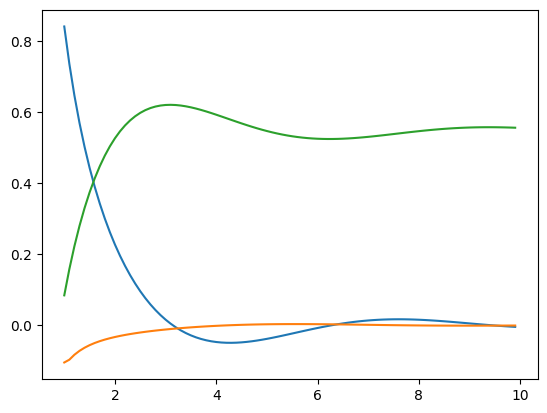

In [41]:
plt.plot(x, y)
plt.plot(x, dydx)
plt.plot(x, y_int)

In [3]:
x = np.linspace(0, 10, 10000)
y = np.exp(-x/10)*np.sin(x)

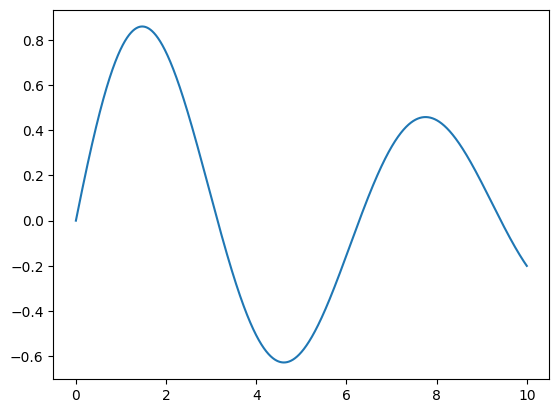

In [6]:
plt.plot(x, y)

In [7]:
# mean and std of y for x in range [4, 7]
mean_y = np.mean(y[(x<=7) & (x>=4)])
std_y = np.std(y[(x<=7) & (x>=4)])

In [8]:
# value of y in between x>4 and x<7 which has 80% points less than it
arr = y[(x<=7) & (x>=4)]
np.percentile(arr, 80)

np.float64(0.061372680560897265)

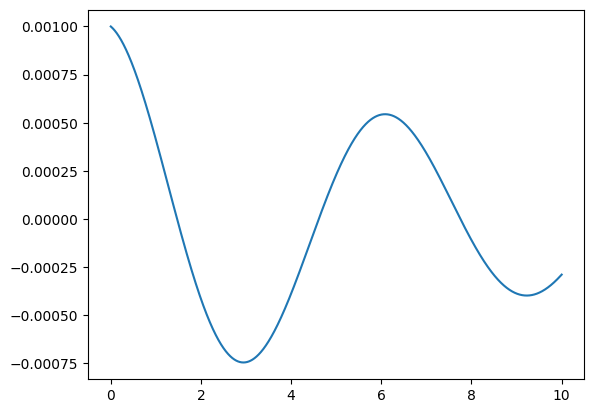

In [9]:
dydx = np.gradient(y)
plt.plot(x, dydx)

In [16]:
# pts where dy/dx is zero, we wont get points where it is exaclty zero since we might not have them so we are using checking where sign of y changed.
x[1:][(dydx[1:]*dydx[:-1])<0]

array([1.47114711, 4.61346135, 7.75477548])

In [7]:
sum([i for i in range(10001) if (i%4!=0 and i%7!=0)])

32147142

In [18]:
nums = np.arange(0, 10001, 1)
sum(nums[(nums%4!=0) & (nums%7!=0)])

np.int64(32147142)

## Matrix Operation

In [3]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
b1 = np.array([1,2,3])
b2 = np.array([4,5,6])

A@b1

array([14, 32, 50])

In [4]:
A@b2

array([ 32,  77, 122])

In [5]:
# Transpose of A
A.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [6]:
#Eigen Values
A = np.array([[4,2,2],[2,4,2],[2,2,4]])
w, v = np.linalg.eig(A)

In [8]:
# Eigen vectors are columns of this matrix
v

array([[-0.81649658,  0.57735027, -0.32444284],
       [ 0.40824829,  0.57735027, -0.48666426],
       [ 0.40824829,  0.57735027,  0.81110711]])

In [9]:
v1 = v[:, 0]
A@v1

array([-1.63299316,  0.81649658,  0.81649658])

In [11]:
w[0]*v1

array([-1.63299316,  0.81649658,  0.81649658])

$$
Ax = λx
$$

# 2D functions

In [35]:
x = np.linspace(0, 10, 1000)
y = np.linspace(0, 10, 1000)
xv, yv = np.meshgrid(x, y)

In [23]:
# x has shape 1000 elements, y has 1000 elements
# there will be 1000 * 1000 elements in grid and for each element we need to have x and y which will be in xv and yv
# xy has 1000*1000 elements, yv has 1000*1000 elements, there will be 1 for each xv and yv

# Meshgrid typical uses

- Creating 2D/3D plots (matplotlib, surface plots)

- Function evaluation on a grid

- Simulation grids

- Tensor broadcasting in ML

In [21]:
xv.shape

(1000, 1000)

In [17]:
xv[0]==xv[1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [18]:
xv[0]==xv[-1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [20]:
yv.shape

(1000, 1000)

In [22]:
yv[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

# Contour plot
- A contour plot is a graphical representation of a 3D surface on a 2D plane using contour lines. Each line connects points of equal value, similar to a topographic map.

To visualize how a function z = f(x, y) behaves across a 2D domain, especially to:

- Identify peaks, valleys, and saddle points
- Show gradients and steepness
- Understand shape of loss functions or terrains


*Contours:* Lines where the function has constant value.

*Levels:* The specific values of z at which contours are drawn.

*Spacing:*

Close contours → steep gradient

Wide contours → gentle slope

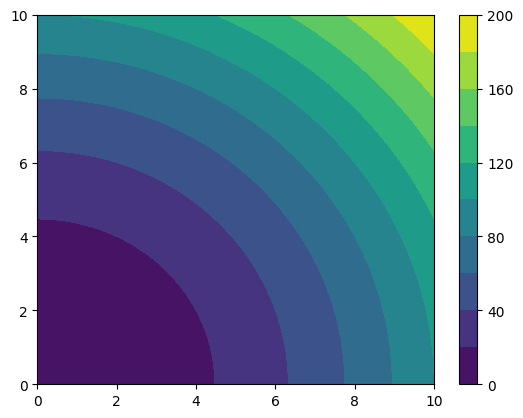

In [63]:
zv = xv**2 + yv**2
# for each contour line, value of z is same over the entire contour
plt.contourf(xv, yv, zv, levels=10)
plt.colorbar()

Above contour plot represents a Elliptic Paraboloid in 3D Why?
Because:

- Every cross-section parallel to the xz- or yz-plane is a parabola.

- Every cross-section parallel to the xy-plane

- It opens upward (bowl-shaped).

- Has a minimum point at the origin (0,0,0).

In [61]:
zv[zv==6.262518775031287]

array([6.26251878, 6.26251878, 6.26251878, 6.26251878, 6.26251878,
       6.26251878])

In [45]:
xv[0]

array([ 0.        ,  0.01001001,  0.02002002,  0.03003003,  0.04004004,
        0.05005005,  0.06006006,  0.07007007,  0.08008008,  0.09009009,
        0.1001001 ,  0.11011011,  0.12012012,  0.13013013,  0.14014014,
        0.15015015,  0.16016016,  0.17017017,  0.18018018,  0.19019019,
        0.2002002 ,  0.21021021,  0.22022022,  0.23023023,  0.24024024,
        0.25025025,  0.26026026,  0.27027027,  0.28028028,  0.29029029,
        0.3003003 ,  0.31031031,  0.32032032,  0.33033033,  0.34034034,
        0.35035035,  0.36036036,  0.37037037,  0.38038038,  0.39039039,
        0.4004004 ,  0.41041041,  0.42042042,  0.43043043,  0.44044044,
        0.45045045,  0.46046046,  0.47047047,  0.48048048,  0.49049049,
        0.5005005 ,  0.51051051,  0.52052052,  0.53053053,  0.54054054,
        0.55055055,  0.56056056,  0.57057057,  0.58058058,  0.59059059,
        0.6006006 ,  0.61061061,  0.62062062,  0.63063063,  0.64064064,
        0.65065065,  0.66066066,  0.67067067,  0.68068068,  0.69

In [24]:
import numpy as np

x = np.array([1, 2, 3])
y = np.array([10, 20])

# x has 3 elemnts and y has 2 elements
# meshgrid will have 6 elements so X and Y both will have 6 elements

X, Y = np.meshgrid(x, y)
print("X:\n", X)
print("Y:\n", Y)

X:
 [[1 2 3]
 [1 2 3]]
Y:
 [[10 10 10]
 [20 20 20]]


# Calculus example